# Práctica 11: Árboles de Decisión.

- Grupo 1:
    - Jesús María Matos Torres.
    - Carlos Santana Esplá.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import mutual_info_classif


## Ejercicio 1: Clasificación de células.

In [33]:
df = pd.read_csv('./datos practicas/Aprendizaje-Automatico-I-main/Práctica 11/wisconsin diagnostic breast cancer.csv')
x = df.iloc[:,2:]
y = df.iloc[:,1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7)
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("El rendimiento del árbol es:", accuracy_score(y_test, y_pred))

El rendimiento del árbol es: 0.9005847953216374


- Como vemos el rendimiento del árbol con los valores por defecto es muy alto, superando un 90% tras varias iteraciones. Dentro del ámbito del problema, este accuracy no nos valdría ya que para determinar el tipo de célula necesitamos una precisión muy próxima al 100%, por que la diferencia restante puede ser vida o muerte.

In [22]:
cr = ["gini", "entropy", "log_loss"]
lt = []

for i in range(len(cr)):
    best, md = 0, 0
    for j in range(1,11,1):
        clf = DecisionTreeClassifier(criterion=cr[i], max_depth=j).fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if best < acc:
            best = acc
            md = j
    lt.append(md)

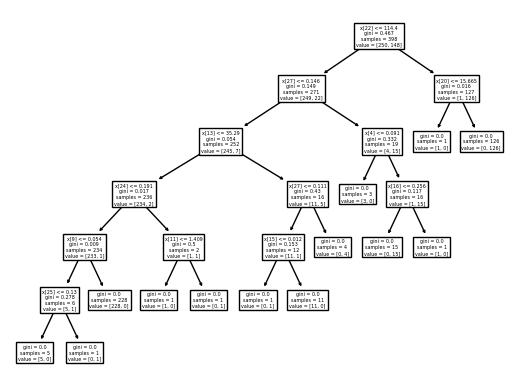

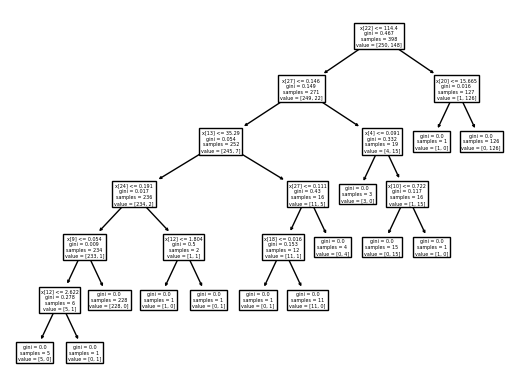

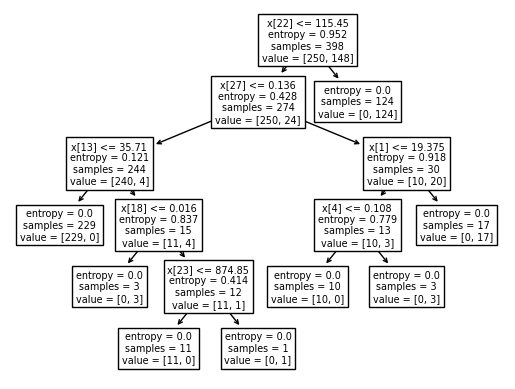

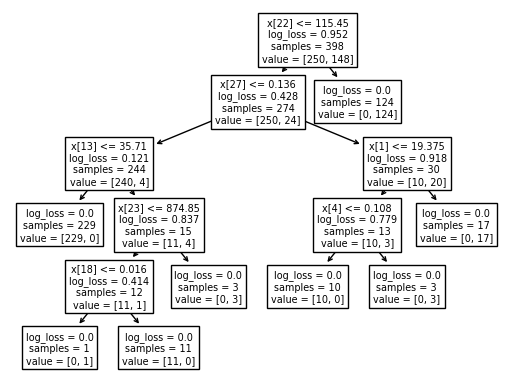

In [23]:
clf = DecisionTreeClassifier().fit(x_train, y_train)
tree.plot_tree(clf)
plt.show()
for i in range(len(lt)):
    clf = DecisionTreeClassifier(criterion=cr[i], max_depth=lt[i]).fit(x_train, y_train)
    tree.plot_tree(clf)
    plt.show()

- Una vez encontrada la mejor profundidad para cada criterio del árbol (default, gini, entropy, log_loss), observamos como el default (primera gráfica) siempre tiene una pronfundidad = 6, mientras que el resto de criterios va variando en cada ejecución del programa, debido a que nuestras muestras se van mezclando en cada ejecución.

## Ejercicio 2:  Selección de características con árbol de decisión.

In [34]:
clf = DecisionTreeClassifier().fit(x_train, y_train)
array = clf.feature_importances_
print(array)
x1 = x.copy()

cols_to_drop = x.columns[array == 0]
x1.drop(cols_to_drop, axis=1, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, train_size=0.7)

clf = SVC().fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("\nRendimiento de la máquina de vectores soporte con feature_importances_",accuracy_score(y_test, y_pred))

[0.         0.03325042 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.03115541 0.         0.         0.
 0.         0.         0.         0.00281186 0.72932966 0.04188464
 0.         0.         0.03286349 0.11798969 0.         0.01071482]

Rendimiento de la máquina de vectores soporte con feature_importances_ 0.9298245614035088


- Mostramos por pantalla las características que vamos a seleccionar del dataframe por su importancia según el atributo feature_importances_, eliminando las columnas no significativas.

In [35]:
x2 = SelectKBest(chi2, k=len(cols_to_drop)).fit_transform(x, y)
print(mutual_info_classif(x2, y))

x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.3, train_size=0.7)

clf = SVC().fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("\nRendimiento de la máquina de vectores soporte con SelectKBest",accuracy_score(y_test, y_pred))

[0.36463072 0.09771986 0.40515702 0.3585632  0.20764612 0.37386473
 0.43969461 0.24917787 0.27726201 0.34055852 0.07513115 0.11589342
 0.12857791 0.45683909 0.12021819 0.47207263 0.46484684 0.09848097
 0.22606175 0.3156611  0.43862989 0.09088317]

Rendimiento de la máquina de vectores soporte con SelectKBest 0.935672514619883


- Igual que en el paso anterior mostramos las mejores características. Sin embargo, hemos utilizado la clase SelectKBest para encontrar el mismo número de características significativas.  

- Finalmente, cuando comparamos las dos medidas de precisión, observamos que no hay una diferencia notoria entre los distintos rendimientos (SVC con feature_importances_, SVC con SelectKBest).